# Problem 3: Gravity simulation

This problem is about simulating the motion of particles under the influence of their mutual gravitational forces.

You don't need to know physics to solve this problem. We will give you equations that describe the motion of the particles. You need to implement them using matrices and vectors.

The exercise intends to test you on your understanding of Numpy. For most problems, we will be giving a naive solution in the test cells. Your solution needs to give the same answers, but what we will assess is the speed of your code. For all these problems, there is a much faster implementation using ideas like broadcasting and vector products that are available in Numpy.

**Grading.** Since we are giving you baseline solutions, we will grade your code by its speed. In particular, **when run on Vocareum**, your solutions need to be faster by a factor of 10 (at least) than the baselines to get credit.

The code developed here can be used to simulate the trajectory of points in 2D space and similar ideas extend to 3D space as well. Similar ideas extend to data analysis and visualization problems, such as computing pairwise correlations, [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), and [force-directed graph layout](https://en.wikipedia.org/wiki/Force-directed_graph_drawing), to name a few. The exercises herein should convince you of the importance of writing efficient code and how Numpy can help you achieve that.

**Physics 101.** Here are the terms you need to know for this problem. Again, we will assume space is two-dimensional (2-D).

0. You are simulating how a system of particles moves in relation to one another. Suppose there are $n$ particles. Each particle, $P_i$, will have the following attributes:
    - A **mass**, $m_i$, which is a measure of how "hefty" a particle is.
    - A **position**, which is a pair of 2-D coordinates, $(x_i, y_i)$, that tells you where the particle is in space.
    - A **velocity**, which is a vector $v_i \equiv (v_{i,x}, v_{i,y})$, that tells you how fast the particle is going and in what direction. The length of a particle's velocity, $\sqrt{v_{i,x}^2 + v_{i,y}^2}$, tells you its speed.
    
1. The position and velocity change over time. In your simulation, time will move forward in small discrete steps, $\Delta t$.

2. Each particle feels a **force** from each of the other particles. The force of gravity is "attractive," meaning that the force a particle feels from each of the others is a little "tug" or "pull." These pulls are what make the planets of the solar system or stars in a galaxy move around one another.

3. The force that $P_i$ feels from $P_j$ is a vector. Its magnitude is the product of the particles' masses, $m_i$ and $m_j$, divided by the squared distance between them, $r_{ij}^2$, that is, $F_{ij} = \frac{m_i m_j}{r_{ij}^2}$. The direction points from $i$ to $j$.

4. The **net force** on a particle is the vector sum of the forces acting on it from all other particles.

5. The net force changes the velocity of the particle.

6. The position of the particle changes at each time step depending on its velocity.

With these specifications, you can now try to simulate the motion of the particles. 

In [1]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

**Exercise 0** (2 points). Complete the function **`pairwise_dist`** below.

Given the position of each particle as coordinates $(x, y)$, find the pairwise distance between each pair of particles. In particular, given the positions of $n$ particles, your function should return a $n \times n$ matrix $D$ where each element, $d_{ij}$, is the distance between particles $i$ and $j$.

Remember that the distance between two points $(x_{1}, y_{1})$ and $(x_{2}, y_{2})$ is given by $((x_{1}-x_{2})^2 + (y_{1} - y_{2})^2)^{1/2}$. This is called the vector norm.

Note, that the test cell offers a naive way of solving the problem. Your code will be tested for accuracy and speed. Your solution needs to be at least **10x** faster than the naive solution provided in the test code for a problem that has 200 particles (as implemented in the test cell).

> Hint: The function **`np.linalg.norm`** may help you in this exercise.

_Example_. The rows in the matrix `X` represent the coordinates of points. Row `i` (i.e., `X[i,:]`) represents the coordinates of the `i`-th point.

The matrix `D` represents the distance matrix between each pair of points. Your task in this exercise is to calculate `D` given `X`.

In [2]:
# Example

X = np.array([[ 3, 4],
              [-3, 4],
              [ 0, 0]])

D = np.array([[0, 6, 5],
              [6, 0, 5],
              [5, 5, 0]])

In [3]:
# http://people.duke.edu/~ccc14/sta-663-2016/03A_Numbers.html
# Code entries 76 and 77 were helpful for elucidating what we are trying to do

In [4]:
def pairwise_dist(X):
    return np.sqrt(np.sum((X[None, :] - X[:, None])**2, -1))

In [5]:
# helper functions
def initialize_system(n=10):
    X = np.random.uniform(1, 2, size=(n,2))
    V = np.random.uniform(-1, 1, size=(n,2))
    m = np.random.uniform(0.1, 2, size=(n))
    return n, m, X, V

In [6]:
# Sample solution
def soln_ex0(X):
    r, c = X.shape
    D_test = np.zeros((r, r))
    for i in range(r):
        for j in range(r):
            vec = X[i] - X[j]
            val = np.sqrt(np.dot(vec, vec))
            D_test[i, j] = val
    return D_test

In [7]:
# test_distances
def check_soln0():
    time_ratio = []
    for _ in range(10):
        n = 200
        X = np.random.rand(n, 2)
        t0_test = time.time()
        D_test = soln_ex0(X)
        t1_test = time.time()
        D_student = pairwise_dist(X)
        t2_student = time.time()
        err = np.linalg.norm(D_student - D_test, ord='fro')
        assert err <= 1e-8, "Your solution does not have the correct distance values"
        time_naive = t1_test - t0_test + 1e-10
        time_student = t2_student - t1_test + 1e-10
        r = time_naive/time_student
        time_ratio.append(r)
    return time_ratio

time_ratio = check_soln0()
mean_ratio = np.mean(time_ratio)
msg = "Your soln is {}x faster than the sample solution (Needs to be at least 10x faster)".format(mean_ratio)
assert mean_ratio >= 10, msg
print(msg)
print("Passed!")

Your soln is 168.20416179585595x faster than the sample solution (Needs to be at least 10x faster)
Passed!


**Exercise 1** (2 points). Complete the function **`mass_products`** below.

Given the mass of the n particles, create a **n x n** matrix **M** such that each ith, jth element of the matrix is the product of masses i and j. You need to complete the mass_products function below.

The test cell contains a naive solution. Your solution must produce the same answer and also be at least 10x faster.

In [8]:
def mass_products(m):
    return np.array([m*item for item in m])
#print(mass_products(s))

In [9]:
# sample solution
def soln_ex1(m):
    n = len(m)
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i, j] = m[i] * m[j]
    return M

In [10]:
print(soln_ex1([1,2,5]))

[[ 1.  2.  5.]
 [ 2.  4. 10.]
 [ 5. 10. 25.]]


In [11]:
# test_products
def check_soln1():
    time_ratio = []
    for _ in range(10):
        n = 200
        m = np.random.rand(n)
        t0_test = time.time()
        M_test = soln_ex1(m)
        t1_test = time.time()
        M_student = mass_products(m)
        t2_student = time.time()
        err = np.linalg.norm(M_student - M_test, ord='fro')
        assert err <= 1e-8, "Your solution does not have the correct values"
        time_naive = t1_test - t0_test + 1e-10
        time_student = t2_student - t1_test + 1e-10
        r = time_naive/time_student
        time_ratio.append(r)
    return time_ratio

time_ratio = check_soln1()
mean_ratio = np.mean(time_ratio)
msg = "Your soln is {}x faster than the sample solution (Needs to be at least 10x faster)".format(mean_ratio)
assert mean_ratio >= 10, msg
print(msg)
print("Passed!")

Your soln is 35.811822794691594x faster than the sample solution (Needs to be at least 10x faster)
Passed!


**Exercise 2** (2 points). Complete the function **`forces`** below.

Now we need to find the forces between each pair of particles. Remember that all particles attract all other particles by a force given by the relation,

$$F_{12} = \frac{m_{1}m_{2}}{r_{12}^{2}}.$$

Given a matrix `M`, which contains the product of all pairwise masses, and the pairwise distance matrix `D`, calculate the `F` matrix by dividing the `M` matrix by squared values from the `D` matrix. We will regard a particle as not exerting a force on itself; therefore, **the diagonal values of the output need to be zero.** Your solution needs to be at least **10x** faster than what has been provided in the sample solution.

In [12]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fill_diagonal.html

def forces(M, D):
    F=M/(D**2)
    np.fill_diagonal(F,0)
    return F


In [13]:
# Sample solution
def soln_ex2(M, D):
    n = len(M)
    F = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                f = M[i, j]/D[i, j]**2
            else:
                f = 0
            F[i, j] = f
    return F

In [14]:
M=soln_ex1([1,2,5])

In [15]:
# test_forces
def check_soln2():
    time_ratio = []
    for _ in range(10):
        n, m, X, V = initialize_system(200)
        D = pairwise_dist(X)
        M = mass_products(m)
        t0_test = time.time()
        F_test = soln_ex2(M, D)
        t1_test = time.time()
        F_student = forces(M, D)
        t2_student = time.time()
        err = np.linalg.norm(F_student - F_test, ord='fro')
        assert err <= 1e-8, "Your solution does not have the correct values"
        time_naive = t1_test - t0_test + 1e-10
        time_student = t2_student - t1_test + 1e-10
        r = time_naive/time_student
        time_ratio.append(r)
    return time_ratio

time_ratio = check_soln2()
mean_ratio = np.mean(time_ratio)
msg = "Your soln is {}x faster than the sample solution (Needs to be at least 10x faster)".format(mean_ratio)
assert mean_ratio >= 10, msg
print(msg)
print("Passed!")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Your soln is 500.7603567533382x faster than the sample solution (Needs to be at least 10x faster)
Passed!


Now that we have the force that acts between each particle, we calculate the net force on each particle. You don't need to do anything in this cell. You will be required to use this function as it is, in a later part.

In [16]:
# X : The position of each particle (n x 2)
# F : The force between each particle (n x n)
# Outputs a n x 2 matrix which has the net force on each of the n particles
def net_force(X, F):
    force_vec = []
    n = X.shape[0]
    for i in range(n):
        x_i = X - X[i]
        x_i_norm = np.linalg.norm(x_i, axis=1) + 1e-10
        x_i_norm = np.reshape(x_i_norm, (n, 1))
        x_i_unit = x_i/x_i_norm
        f_i = x_i_unit * F[:, [i]]
        net_f_i = np.sum(f_i, axis=0)
        force_vec.append(net_f_i)
    net_F = np.vstack(force_vec)
    return net_F

**Particle velocities.** The next step is to update the velocities of each particle.

Given a particle's initial velocity and the net force acting on it, the equation to update the velocity at the next time step is given by:

$V = V_{\mathrm{init}} + \dfrac{F}{m} \Delta t$

Here, $V_{\mathrm{init}}$ is the initial velocity before the effect of the force, $F$ is the net force acting, $m$ is the particle's mass, and $\Delta t$ is the time step. Note that after each $\Delta t$ the position of the particle changes and hence it experiences a new force depending on its updated coordinates. This is how the system evolves with time.

**Exercise 3** (1 point). Complete the **`update_V`** function below.

It calculates the updated velocities for each particle given their initial velocity matrix (*`V_init`*), net forces matrix (*`net_F`*), mass array (*`m`*), and time step (*`delta_t`*). Your solution needs to be **10x** faster on Vocareum than what has been provided in the sample solution.

In [17]:
def update_V(V_init, net_F, m, delta_t):
    return V_init+net_F/np.reshape(m, (len(m), 1))*delta_t



In [18]:
# Sample solution
def soln_ex3(V_init, net_F, m, delta_t):
    V = np.zeros_like(V_init)
    n = m.shape[0]
    for i in range(n):
        v = V_init[i] + net_F[i]/m[i] * delta_t
        V[i] = v
    return V

In [19]:
# test_velocities
def check_soln3():
    time_ratio = []
    delta_t = 1e-4
    for _ in range(10):
        n, m, X, V = initialize_system(200)
        D = pairwise_dist(X)
        M = mass_products(m)
        F = forces(M, D)
        net_F = net_force(X, F)
        t0_test = time.time()
        V_test = soln_ex3(V, net_F, m, delta_t)
        t1_test = time.time()
        V_student = update_V(V, net_F, m, delta_t)
        t2_student = time.time()
        err = np.linalg.norm(V_student - V_test, ord='fro')
        assert err <= 1e-8, "Your solution does not have the correct values"
        time_naive = t1_test - t0_test + 1e-10
        time_student = t2_student - t1_test + 1e-10
        r = time_naive/time_student
        time_ratio.append(r)
    return time_ratio

time_ratio = check_soln3()
mean_ratio = np.mean(time_ratio)
msg = "Your soln is {}x faster than the solution in the test cell (Needs to be atleast 10x faster)".format(mean_ratio)
assert mean_ratio >= 10, msg
print(msg)
print("Passed!")

Your soln is 62.813599913416816x faster than the solution in the test cell (Needs to be atleast 10x faster)
Passed!


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


**Exercise 4** (1 point)

Now, we need to update the coordinates of the masses. The equation to update the positions are given by

$X = X_{init} + V*\Delta t$

Given the $X_{init}$ (position coordinates), V (updated velocity) and $\Delta t$ we can calculate the new positions of the particles. Your solution needs to be **10x** faster than what has been provided in the sample solution.

Complete the **update_X** function below.

In [20]:
def update_X(X_init, V, delta_t):
    return X_init+V*delta_t


In [21]:
# Sample solution
def soln_ex4(X_init, V, delta_t):
    n = X_init.shape[0]
    X = np.zeros_like(X_init)
    for i in range(n):
        x = X_init[i] + V[i] * delta_t
        X[i] = x
    return X

In [22]:
# test_position
def check_soln4():
    time_ratio = []
    delta_t = 1e-4
    for _ in range(10):
        n, m, X_init, V = initialize_system(200)
        t0_test = time.time()
        X_test = soln_ex4(X_init, V, delta_t)
        t1_test = time.time()
        X_student = update_X(X_init, V, delta_t)
        t2_student = time.time()
        err = np.linalg.norm(X_student - X_test, ord='fro')
        assert err <= 1e-8, "Your solution does not have the correct values"
        time_naive = t1_test - t0_test + 1e-10
        time_student = t2_student - t1_test + 1e-10
        r = time_naive/time_student
        time_ratio.append(r)
    return time_ratio

time_ratio = check_soln4()
mean_ratio = np.mean(time_ratio)
msg = "Your soln is {}x faster than the solution in the test cell (Needs to be atleast 10x faster)".format(mean_ratio)
assert mean_ratio >= 10, msg
print(msg)
print("Passed!")

Your soln is 164.6223933692874x faster than the solution in the test cell (Needs to be atleast 10x faster)
Passed!


Now we put together all the above steps to simulate the motion of particles under their mutual gravitational forces.

At the beginning of our simulation we have the following information about our system.



**`m`** - the masses of the particles in the system

**`X_init`** - Initial position coordinates of the particles

**`V_init`** - Initial velocities of the particles

**`delta_t`** - The size of the time step, i.e. the time interval between two successive states in our simulation.

(Our system evolves from state $S_{1}$ to state $S_{2}$ such that the two states are separated by $\Delta t$ time)

The steps are as follows -

1. Calculate all pairwise distances **`D`**

2. Calculate the pairwise mass products **`M`**

3. Calculate the pairwise forces **`F`**

4. Calculate the net force using **`net_F`** the function we have provided

5. Update the velocity **`V`** based on the net_force

6. Update the position coordinates **`X`** based on this updated velocity

7. Repeat this step **`T`** times to see how the system evolves into the future

**Exercise 5** (2 points). As described above, complete the **`run_simulation`** function below.

The function should simulate the motion of the particles under their mutual gravitation. Your function should take the input **`X_init`**, **`V_init`**, **`m`**, **`delta_t`**, **`T`** and simulate the system for **`T`** time steps into the future. The output should be the position coordinates and velocity matrix of each particle at the end of the T time-steps. This part does not have a sample solution to compare speed. If you have implemented the previous parts in a correct way, this part should be naturally fast to implement.

In [36]:
def run_simulation(X_init, V_init, m, delta_t, T):
    for i in range(T):
        D=pairwise_dist(X_init)
        M=mass_products(m)
        F=forces(M, D)
        net_F=net_force(X_init,F)
        V_init=update_V(V_init, net_F, m, delta_t)
        X_init=update_X(X_init, V_init, delta_t)
    return X_init,V_init


In [37]:
# test_simulation
delta_t = 1e-3
n, m, X_init, V_init = initialize_system(10)
mx1 = np.sum(X_init * m.reshape((n, 1)), axis=0)
mv1 = np.sum(V_init * m.reshape((n, 1)), axis=0)

for _ in range(5):
    T = np.random.randint(100, 500)
    X, V = run_simulation(X_init, V_init, m, delta_t, T)
    mx2 = np.dot(m, X)
    mv2 = np.dot(m, V)
    assert np.linalg.norm(mv1 - mv2) < 1e-6, "Incorrect solution. Net momentum not conserved."
    assert np.linalg.norm(mx2 - mx1 - mv1*T*delta_t) < 1e-6, "Incorrect solution, centre of mass not conserved"
print("Passed!")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Passed!


We now put it all together to plot the trajectories of these particles in 2D space. 

If all parts above have been implemented correctly, you should be able to see the trajectory of these particles as the system evolves in time. However there are no points for this part. We still encourage you to run this part to visualize what you have implemented in this part.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


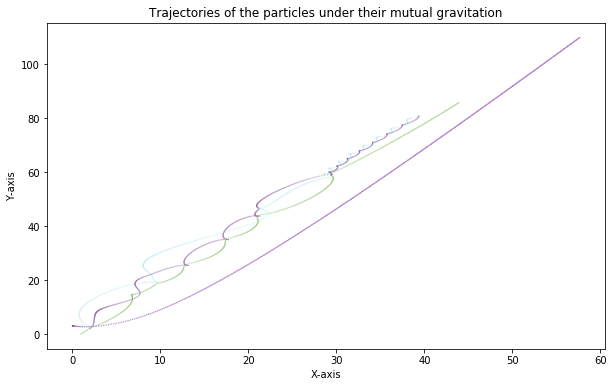

In [38]:
X_init = np.array([[1, 3], 
                  [2, 2], 
                  [1, 0], 
                  [0, 3]])

V_init = np.array([[1, 0],
                  [1, 3],
                  [1, 2],
                  [0, 0]])

m = np.array([1, 2, 3, 1])
delta_t = 1e-3

fig = plt.figure(figsize=(10, 6))
c = np.random.rand(X.shape[0], 3)
for _ in range(500):
    n = 100
    s = [0.05 for _ in range(X.shape[0])]
    plt.scatter(X_init[:,0], X_init[:,1], s=s, color=c)
    X_init, V_init = run_simulation(X_init, V_init, m, delta_t, n)
    
plt.title("Trajectories of the particles under their mutual gravitation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

**Fin!** Remember to test your solutions by running them as the autograder will: restart the kernel and run all cells from "top-to-bottom." Also remember to submit to the autograder; otherwise, you will **not** get credit for your hard work!